# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [3]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargar datos

In [4]:
# Carga el archivo de datos en un DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [5]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
# imprimir una muestra de datos
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


# Comprobando si mi data tiene valores ausentes.
data.isna().sum()

In [8]:
# Revisando si nuestra data ontiene valores duplicados.
data.duplicated().sum()

0

### Conclusiones y siguientes pasos

- Tenemos un dataframe con muchos valores ausentes, lo importante es que e varias columnas no tiene importacia y no afectaria a nuestros analisis.
- La columna con la fecha 'model_year' esta en números flotantes, esta la cambiaremos a datetime
- La columna 'date_posted' la tenemos como objecto esta se cambiara a tipo de numero enteros.
- Encontramos que 5 columnas tienen valores ausentes, y la mayor cantidad de valores ausentes la tiene la columna is_4wd 


## Tratar los valores ausentes (si hay)

- Aqui vamos a abordar los valores ausentes de cada una de la columnas 



In [9]:
# veamos cuantos valores ausentes tiene model_year
data['model_year'].isna().sum()

3619

In [10]:
# Vamos a corregir los valores ausentes de la columna model_year con la mediana, tomando en consideracion una agrupacion por condition
data_10 = data.groupby(['condition'])['model_year'].transform('median')
data['model_year'].fillna(data_10, inplace=True)
data_10.head()

0    2009.0
1    2009.0
2    2014.0
3    2003.0
4    2012.0
Name: model_year, dtype: float64

In [11]:
# revisando que los valores fueron sustituidos.
data['model_year'].isna().sum()

0

In [12]:
# sigamos con la columna odometer
data['cylinders'].isna().sum()

5260

In [13]:
# vamos a corregir los valores de la columna cylinders con la mediana agrupando por el modelo del auto.
data_11 = data.groupby(['model'])['cylinders'].transform('median')
data['cylinders'].fillna(data_11, inplace=True)

In [14]:
# revisando que los valores fueron sustituidos.
data['cylinders'].isna().sum()

0

In [15]:
# sigamos con la columna odometer
data['odometer'].isna().sum()

7892

In [16]:
# vamos a corregir los valores de la columna odometer con la mediana agrupando por el modelo del auto.
data_12 = data.groupby(['model_year'])['odometer'].transform('median')
data['odometer'].fillna(data_12, inplace=True)

In [17]:
# revisemos si fueron corregidos
data['odometer'].isna().sum()

1

In [18]:
data.groupby(['model_year'])['odometer']

In [19]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [21]:
# sigamos con la columna paint_color
data['paint_color'].isna().sum()

9267

In [22]:
# sigamos con la columna paint_color, como esta es de tipo objecto los valores ausentes seran sustituidos por 'otro'
data['paint_color'] = data['paint_color'].fillna('otro')


In [23]:
# revisemos si fueron sustituidos
data['paint_color'].isna().sum()

0

In [24]:
# revisemos la columna is_4wd
data['is_4wd'].isna().sum()

25953

In [25]:
# esta es la columna con mas valores ausentes revisemos sus valores 
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [26]:
# vamos a sustituir los valores por un cero ya que estos son valores booleanos 
data['is_4wd'] = data['is_4wd'].fillna(0)

In [27]:
# comprobemos si fueros sustituidos 
data['is_4wd'].isna().sum()

0

In [28]:
# valores
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [29]:
#revisemos nuestra informacion del dataframe 
print(data.isna().sum())
print()
print(data.info())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64 

## Corregir los tipos de datos

In [30]:
# Vamos a corregir el tipo de datos de dos columnas
# Columna date_psted de objecto a datetime64
# Columna model_year de float64 a int64

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data['model_year'] = data['model_year'].astype(int)

In [31]:
# verificando que se corrigieron
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


## Enriquecer datos

In [32]:
# Dia de la semana
data['day'] = data['date_posted'].dt.day_name()
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday
3,1500,2003,ford f-150,fair,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday


In [33]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['year_posted'] = data['date_posted'].dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday,2018
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2019
3,1500,2003,ford f-150,fair,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,2019


In [34]:
data['year_published'] = data['year_posted'] - data['model_year']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year_posted,year_published
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday,2018,7
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,2018,9
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2019,6
3,1500,2003,ford f-150,fair,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday,2019,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,2019,2


In [35]:
# Agrega el millaje promedio del vehículo por año
data['millaje_promedio'] = data['odometer'] / data['year_published']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year_posted,year_published,millaje_promedio
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday,2018,7,20714.285714
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,2018,9,9856.111111
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday,2019,16,10163.187500
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,2019,2,40451.500000


In [36]:
def millaje_promedio(row):
    if row['year_published'] != 0:
        return row['odometer']/row['year_published']
    else:
        return 0
data['millaje_promedio'] = data.apply(millaje_promedio, axis=1)

In [37]:
# Remplazando los valores de condition para un mejor estudio 
data['condition'].unique()
data['condition'] = data['condition'].replace('good', 2)
data['condition'] = data['condition'].replace('like new', 4)
data['condition'] = data['condition'].replace('fair', 1)
data['condition'] = data['condition'].replace('excellent', 3)
data['condition'] = data['condition'].replace('salvage', 0)
data['condition'] = data['condition'].replace('new', 5)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year_posted,year_published,millaje_promedio
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday,2018,7,20714.285714
1,25500,2009,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,2018,9,9856.111111
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday,2019,16,10163.187500
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,2019,2,40451.500000


In [38]:
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Comprobar datos limpios

In [39]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51524 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  day               51525 non-null  object        
 14  year_posted       5152

In [40]:
# imprimir una muestra de datos
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year_posted,year_published,millaje_promedio
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday,2018,7,20714.285714
1,25500,2009,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,2018,9,9856.111111
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday,2019,16,10163.187500
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,2019,2,40451.500000


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

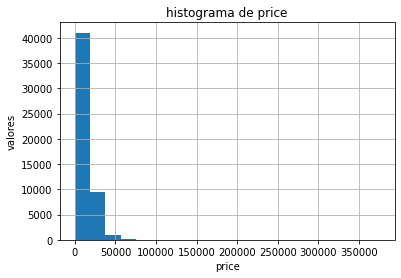

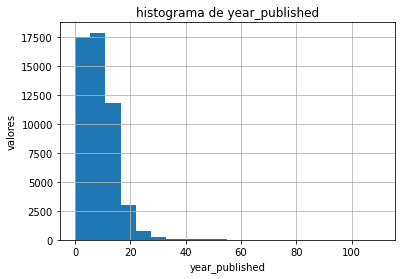

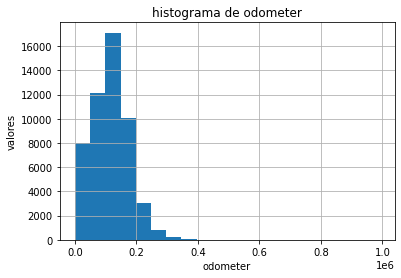

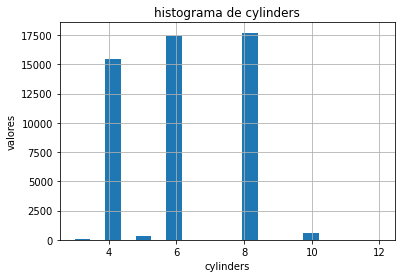

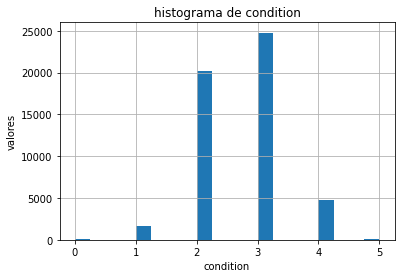

In [41]:
# Haremos los histogramas para ver los valores de las columnas de interes, y ya que son varias trabajaremos con un ciclo for
columns_hist = ['price', 'year_published', 'odometer', 'cylinders', 'condition']

for columns in columns_hist:
    plt.hist(data[columns], bins= 20)
    plt.title(f'histograma de {columns}')
    plt.xlabel(columns)
    plt.ylabel('valores')
    plt.grid(True)
    plt.show()
  


## Estudiar y tratar valores atípicos


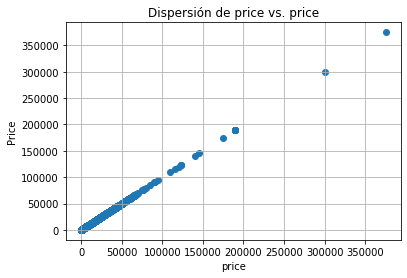

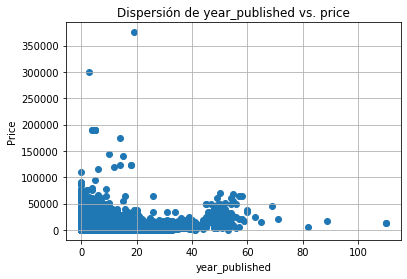

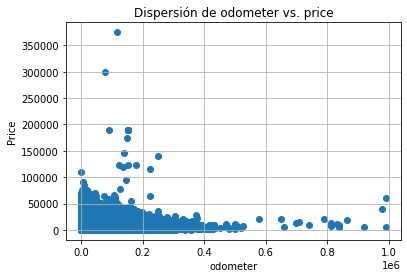

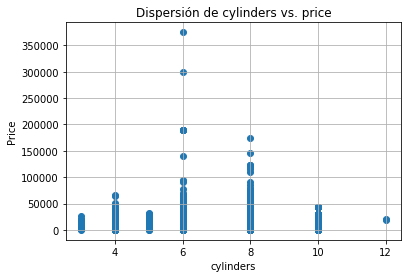

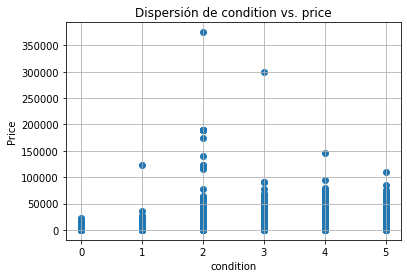

In [42]:
# vamos a revisar la dispersión de acuerdo a la columna price iterando en un for ya que son varias comparaciones 
for columns in columns_hist:
    plt.scatter(data[columns], data['price'])
    plt.title(f"Dispersión de {columns} vs. price")
    plt.xlabel(columns)
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

In [43]:
# Vamos a trabajar los valores atipicos con una funcion que nos ayude 
def limites(data, x=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_mayor = Q3 + x * IQR
    limite_menor = Q1 - x * IQR
    return limite_mayor, limite_menor

In [44]:
# Determinando los límites inferiores y superiores para valores atípicos
limite_mayor, limite_menor= limites(data['price'])
data_lim = data[(data['price'] >= limite_menor) & (data['price'] <= limite_mayor)]

limite_mayor, limite_menor = limites(data['year_published'])
data_lim = data[(data['year_published'] >= limite_menor) & (data['year_published'] <= limite_mayor)]

limite_mayor, limite_menor = limites(data['model_year'])
data_lim = data[(data['model_year'] >= limite_menor) & (data['model_year'] <= limite_mayor)]

In [45]:
data_lim.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year_posted,year_published,millaje_promedio
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,otro,1.0,2018-06-23,19,Saturday,2018,7,20714.285714
1,25500,2009,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,2018,9,9856.111111
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,162611.0,automatic,pickup,otro,0.0,2019-03-22,9,Friday,2019,16,10163.187500
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,2019,2,40451.500000


## Estudiar parámetros principales sin valores atípicos

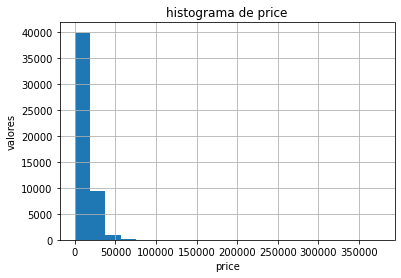

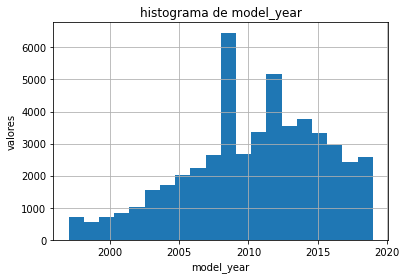

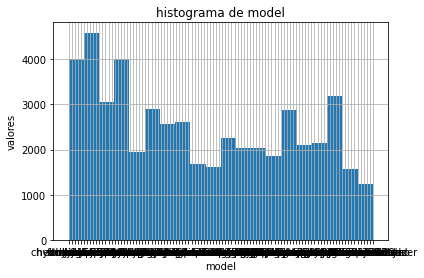

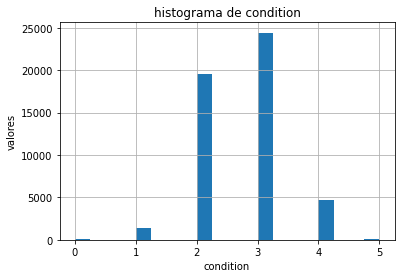

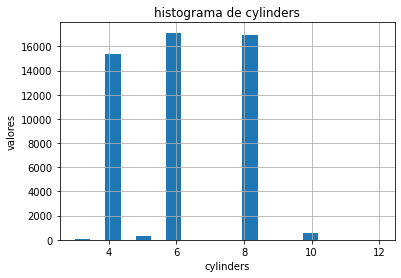

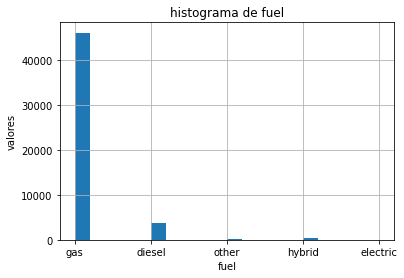

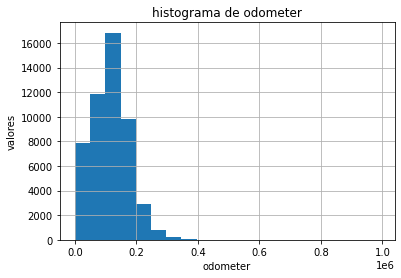

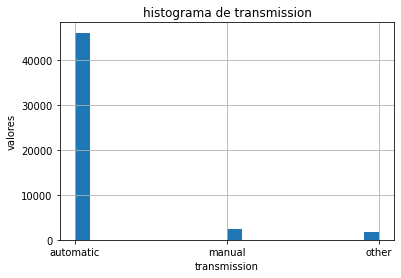

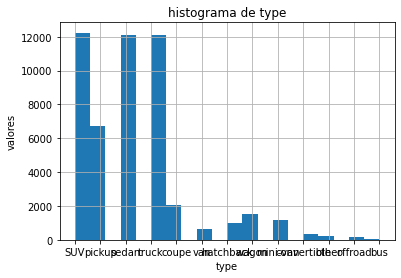

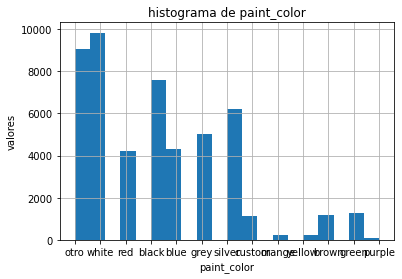

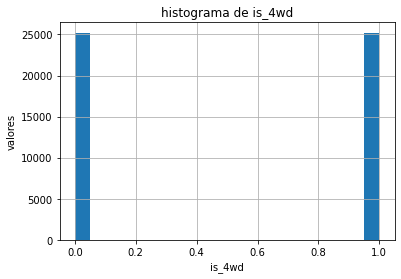

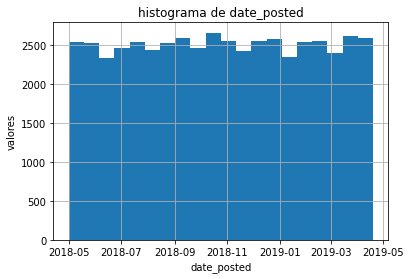

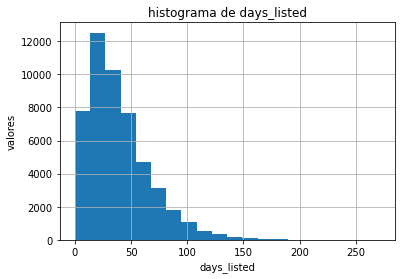

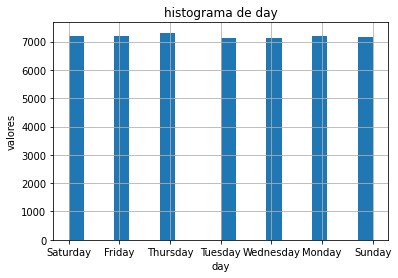

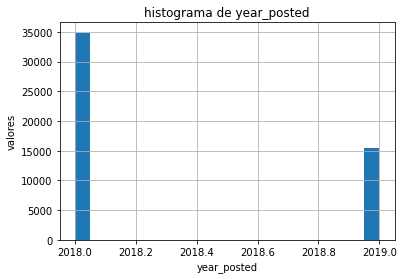

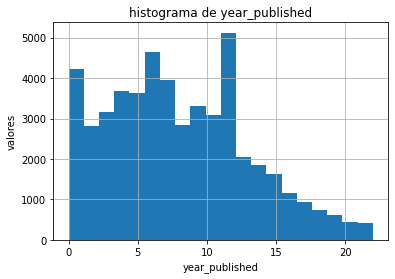

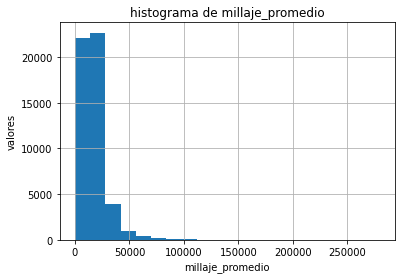

In [46]:
# vamos a volver a traer nuestro bucle for para trabajar con los valores limpios.
for columns in data_lim:
    plt.hist(data_lim[columns], bins=20)
    plt.title(f'histograma de {columns}')
    plt.xlabel(columns)
    plt.ylabel('valores')
    plt.grid(True)
    plt.show()

## Periodo de colocación de los anuncios

Valor medio: 39.55475982532751
Valor mediano: 33.0



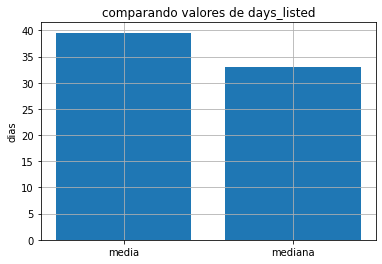

In [47]:
# calculando la mediana y la media de la column days_listed
data_14 = data['days_listed'].mean()
data_15 = data['days_listed'].median()
print(f'Valor medio: {data_14}')
print(f'Valor mediano: {data_15}')
print()
# haremos un grafico de barra para comparar estos valores.
plt.bar(['media', 'mediana'], [data_14, data_15])
plt.title(f"comparando valores de days_listed")
plt.ylabel('dias')
plt.grid(True)
plt.show()

## Precio promedio por cada tipo de vehículo

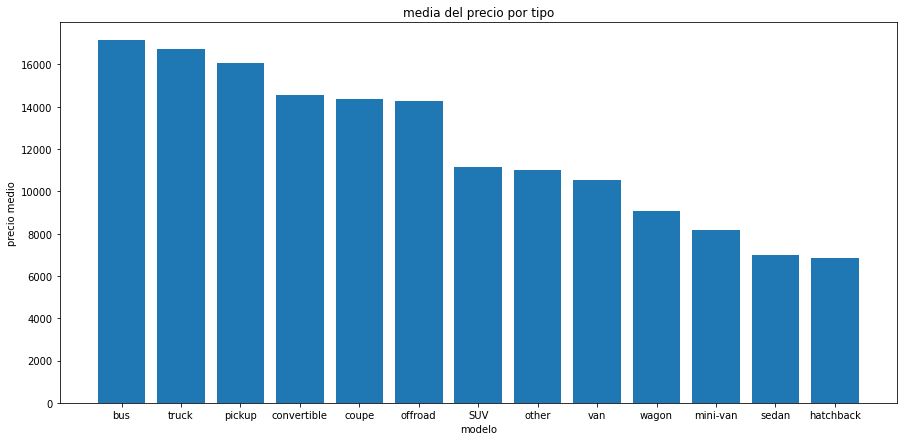

In [48]:
# vamos a obeterner una agrupacion y un grafico de barra para comprar los tipos de autos por precio y modelo.
data_16 = data.groupby('type')['price'].mean()
data_16 = data_16.sort_values(ascending=False)

plt.figure(figsize=(15,7))
plt.bar(data_16.index, data_16)
plt.title('media del precio por tipo')
plt.xlabel('modelo')
plt.ylabel('precio medio')
plt.show()

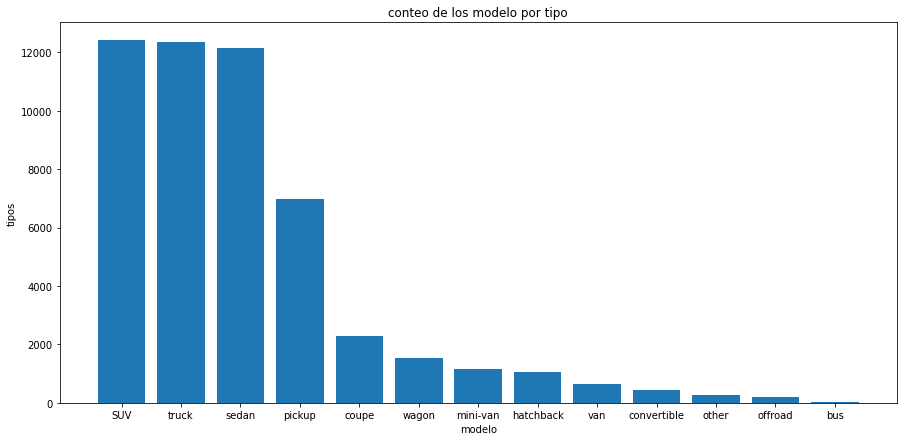

In [49]:
data_17 = data.groupby('type')['model'].count()
data_17 = data_17.sort_values(ascending=False)

plt.figure(figsize=(15,7))
plt.bar(data_17.index, data_17)
plt.title('conteo de los modelo por tipo')
plt.xlabel('modelo')
plt.ylabel('tipos')
plt.show()

## Factores de precio

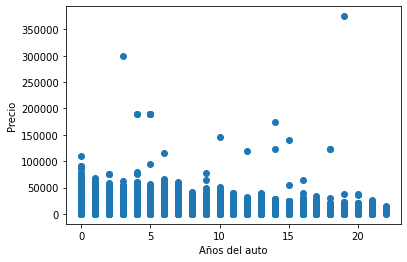

In [50]:
plt.scatter(data_lim['year_published'], data_lim['price'])
plt.xlabel('Años del auto')
plt.ylabel('Precio')
plt.show()

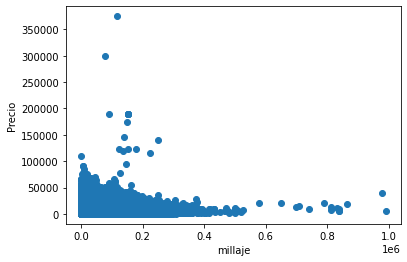

In [51]:
plt.scatter(data_lim['odometer'], data_lim['price'])
plt.xlabel('millaje')
plt.ylabel('Precio')
plt.show()

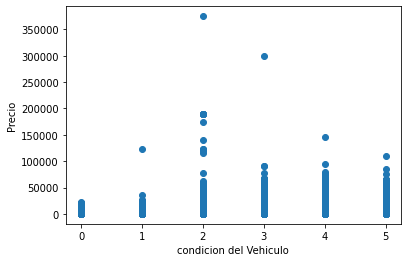

In [52]:
plt.scatter(data_lim['condition'], data_lim['price'])
plt.xlabel('condicion del Vehiculo')
plt.ylabel('Precio')
plt.show()

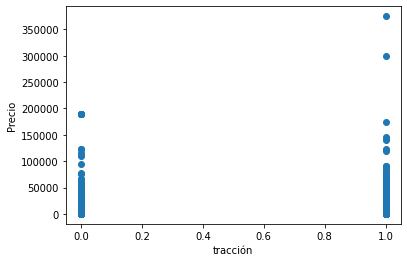

In [53]:
plt.scatter(data_lim['is_4wd'], data_lim['price'])
plt.xlabel('tracción')
plt.ylabel('Precio')
plt.show()

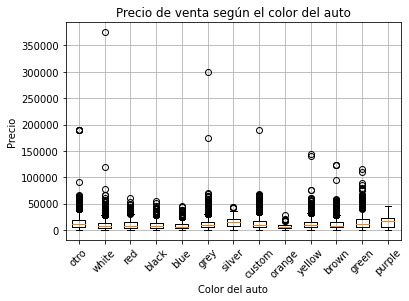

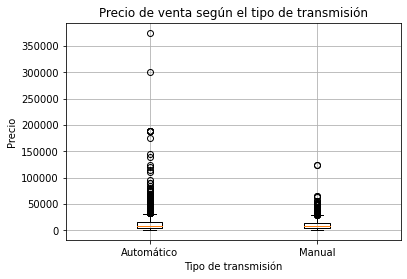

In [54]:
# Gráfico para paint_color
plt.boxplot(data_lim.groupby('paint_color')['price'].apply(list))
plt.xticks(range(1, len(data_lim['paint_color'].unique()) + 1), data_lim['paint_color'].unique(), rotation=45)
plt.xlabel('Color del auto')
plt.ylabel('Precio')
plt.title('Precio de venta según el color del auto')
plt.grid(True)
plt.show()

# Gráfico para transmission
plt.boxplot([data_lim[data_lim['transmission'] == 'automatic']['price'],
             data_lim[data_lim['transmission'] == 'manual']['price']])
plt.xticks([1, 2], ['Automático', 'Manual'])
plt.xlabel('Tipo de transmisión')
plt.ylabel('Precio')
plt.title('Precio de venta según el tipo de transmisión')
plt.grid(True)
plt.show()

<bound method DataFrame.corr of         condition       odometer  year_published
price                                           
1        3.005044   43604.569987        2.709962
3        2.000000  153000.000000       13.000000
5        2.000000  123538.000000        7.000000
6        2.000000  173500.000000       20.000000
9        2.000000     119.000000        9.000000
...           ...            ...             ...
145000   4.000000  140000.000000       10.000000
175000   2.000000  149000.000000       14.000000
189000   2.000000  140974.333333        4.666667
300000   3.000000   78514.000000        3.000000
375000   2.000000  115000.000000       19.000000

[3423 rows x 3 columns]>


array([[<AxesSubplot:xlabel='condition', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='year_published', ylabel='condition'>],
       [<AxesSubplot:xlabel='condition', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='year_published', ylabel='odometer'>],
       [<AxesSubplot:xlabel='condition', ylabel='year_published'>,
        <AxesSubplot:xlabel='odometer', ylabel='year_published'>,
        <AxesSubplot:xlabel='year_published', ylabel='year_published'>]],
      dtype=object)

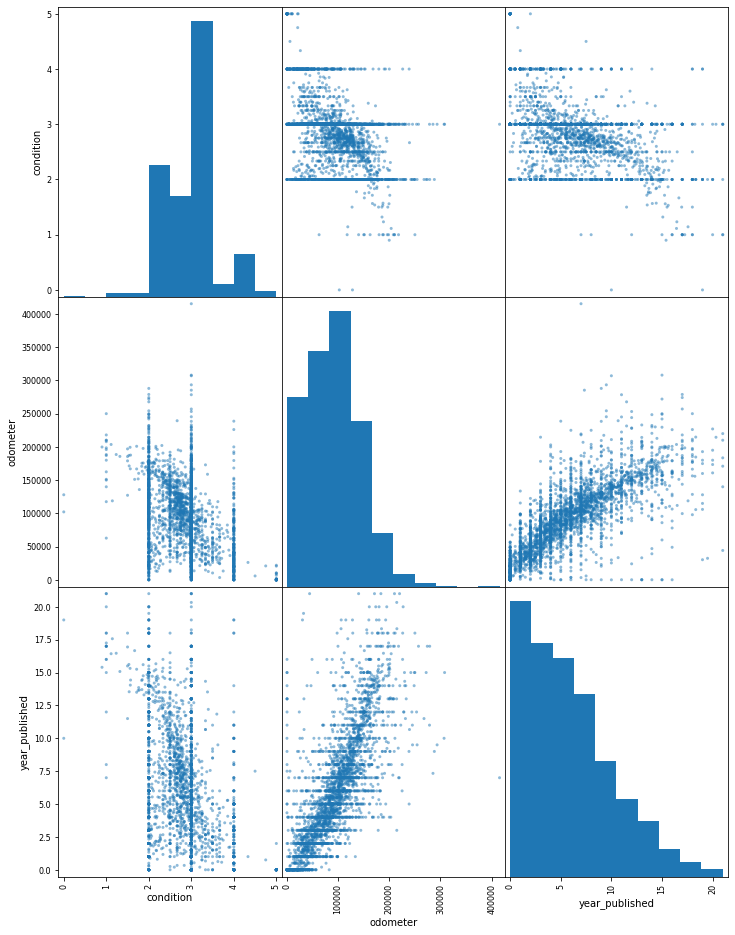

In [55]:
precio_corr = data_lim.pivot_table(index='price', values=['year_published', 'odometer', 'condition'])

print(precio_corr.corr)

pd.plotting.scatter_matrix(precio_corr, figsize=(12,16))

## Conclusión general

- tenemos un dataframe con valores ausentes que son importantes, estos fueron sustituidos por las medianas de los valores de esas columnas, revisamos por valores duplicados y tuvimos una data limpia sin valores duplicados.
- no necesitamos obtener la hora de publicación ya que si la creamos todas esas horas serian hora cero por lo tanto no es relevante para nuestro analisis de datos. 
- corregimos los valores atipicos creando un nuevo dataframe para un analisis mas limpio y preciso 
- obtuvimos resultados donde nos dimos cuenta que todos los valores de nuestra data son importante e influyen en el precio de los autos, especialmente el millaje y el tipo del vehiculo.
- como tambien descubrimos que mientras peor sea la condicion del auto menor es el precio.
- existe una afinidad entre el millaje y el precio mientras menos millaje mal alto el precio
- tambien realizamos una diagrama de caja para las columnas del data de tipo categorico.
- y para las variables numericas un diagrama de dispersión

Gracias 
- Alex Segovia 24/02/2023